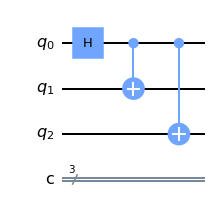

In [44]:
from qiskit.circuit.library import MCXGate
gate = MCXGate(4)

from qiskit import QuantumCircuit
circuit = QuantumCircuit(3,3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure_all
circuit.draw('mpl')


Total count for 00 and 11 are: {'011': 514, '000': 486}


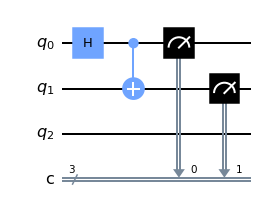

In [51]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(3, 3)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])
circuit.measure_all
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


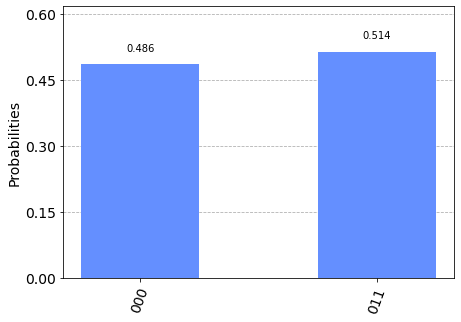

In [52]:
# Plot a histogram
plot_histogram(counts)